Ошибка получения данных для New York: 401
Ошибка получения данных для London: 401
Ошибка получения данных для Tokyo: 401
Ошибка получения данных для Moscow: 401
Ошибка получения данных для Dubai: 401
Собранные данные:
       city temperature humidity pressure
0  New York        None     None     None
1    London        None     None     None
2     Tokyo        None     None     None
3    Moscow        None     None     None
4     Dubai        None     None     None


<ipython-input-1-2e1940b89d24>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='city', y='temperature', data=df, palette='coolwarm')


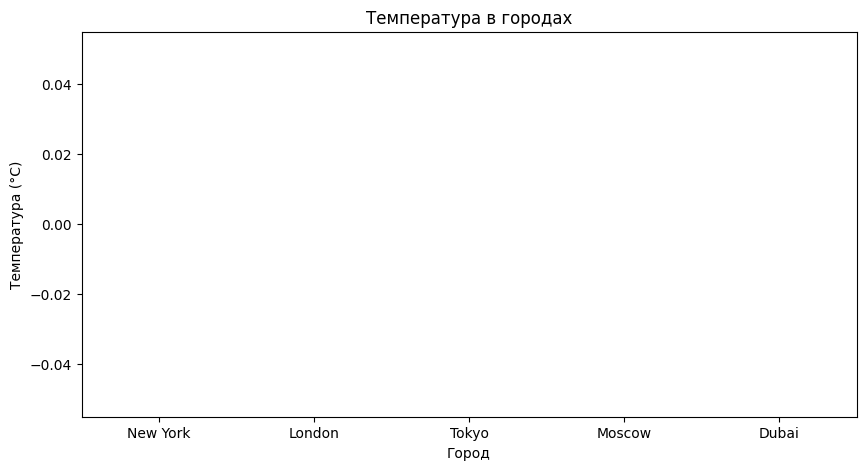

Файл сохранён: weather_data.csv
Загруженные данные из CSV:
       city  temperature  humidity  pressure
0  New York          NaN       NaN       NaN
1    London          NaN       NaN       NaN
2     Tokyo          NaN       NaN       NaN
3    Moscow          NaN       NaN       NaN
4     Dubai          NaN       NaN       NaN


In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# API настройки (замени на свой реальный API-ключ!)
API_KEY = "your_api_key"  # ⚠️ ВСТАВЬ СВОЙ API-КЛЮЧ!
CITIES = ["New York", "London", "Tokyo", "Moscow", "Dubai"]
BASE_URL = "http://api.openweathermap.org/data/2.5/weather"

def get_weather(city):
    """Функция получает погоду для указанного города."""
    params = {"q": city, "appid": API_KEY, "units": "metric"}
    response = requests.get(BASE_URL, params=params)
    if response.status_code == 200:
        data = response.json()
        return {
            "city": city,
            "temperature": data["main"]["temp"],
            "humidity": data["main"]["humidity"],
            "pressure": data["main"]["pressure"]
        }
    else:
        print(f"Ошибка получения данных для {city}: {response.status_code}")
        return {"city": city, "temperature": None, "humidity": None, "pressure": None}

# Сбор данных
data = [get_weather(city) for city in CITIES]
df = pd.DataFrame(data)
print("Собранные данные:")
print(df)

# Визуализация температуры
plt.figure(figsize=(10, 5))
sns.barplot(x='city', y='temperature', data=df, palette='coolwarm')
plt.title('Температура в городах')
plt.xlabel('Город')
plt.ylabel('Температура (°C)')
plt.show()

# Сохранение данных в CSV-файл (локально)
file_path = "weather_data.csv"
df.to_csv(file_path, index=False)
print(f"Файл сохранён: {file_path}")

# Проверка: загрузка данных из файла
df_downloaded = pd.read_csv(file_path)
print("Загруженные данные из CSV:")
print(df_downloaded)
